# Examination of the veracity of the Titanic dataset in Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import difflib as dl

sns.set_style('whitegrid');
sns.set_theme();
plt.figure(figsize=(18,6));

%matplotlib inline

<Figure size 1800x600 with 0 Axes>

## Import Titanic passenger list data

Is it possible to find actual date of birth for each passanger? These data sources only have age (it seems).

These data sets were downloaded from https://www.kaggle.com/c/titanic/data

In [2]:
titanic_training_data_kaggle = pd.read_csv('train.csv')
titanic_test_data_kaggle = pd.read_csv('test.csv')

In [3]:
titanic_training_data_kaggle.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


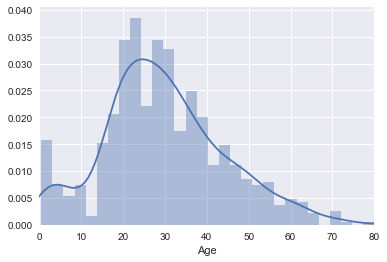

In [4]:
ax = sns.distplot(titanic_training_data_kaggle['Age'].dropna(), bins=30)
ax.set_xlim(0,80);


In [5]:
titanic_training_data_kaggle['Name'] = titanic_training_data_kaggle['Name'].apply(lambda x : x.replace(u'\xa0', ' '))

In [6]:
def extract_names(nameString, return_type):
    
    firstname = 'XXX NO FIRSTNAME XXX'
    othernames = ''
    
    tmp = nameString.split()
    if tmp[0][-1] == ',':
        surname = tmp[0][0:len(tmp[0])-1]
        title = tmp[1][0:len(tmp[1])-1]
        mynames = tmp[2:len(tmp)]
    else:
        surname = tmp[0] + ' ' + tmp[1][0:len(tmp[0])-1]
        title = tmp[2][0:len(tmp[2])-1]
        mynames = tmp[3:len(tmp)]

    firstname = mynames[0]
    othernames = ''
    for name in mynames[1:len(mynames)-1]:
        othernames = othernames + name + ' '
    othernames = othernames.rstrip()       
        
    try:
        if mynames[len(mynames)-1][-1] == ')':          # extract female/wife name
            othernames = ''
            for name in mynames:
                othernames = othernames + name + ' '
                if name[0] == '(':
                    othernames = ''
                    firstname = name[1:len(name)]
            othernames = othernames.rstrip()
            othernames = othernames[0:len(othernames)-1]             
    except:
        pass
    
    if return_type == 1:
        return title
    elif return_type == 2:
        return surname
    elif return_type == 3:
        return firstname
    else:
        return othernames

In [7]:
titanic_training_data_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic_test_data_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Merge the Kaggle train and test datasets into one (for comparison to other Titanic data sets/sources)

In [9]:
titanic_data_kaggle = pd.merge(titanic_training_data_kaggle, titanic_test_data_kaggle, how='outer')

In [10]:
titanic_data_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


So in the combined dataset of 1309 (= 891 train + 418 test) passengers, there are 1046 non-null age values.

Let's extract the components of the 'Name' field into title, surname, first name and other names.

In [11]:
titanic_data_kaggle['Title'] = titanic_data_kaggle['Name'].apply(lambda x : extract_names(x, 1))
titanic_data_kaggle['Surname'] = titanic_data_kaggle['Name'].apply(lambda x : extract_names(x, 2))
titanic_data_kaggle['Firstname'] = titanic_data_kaggle['Name'].apply(lambda x : extract_names(x, 3))
titanic_data_kaggle['Othernames'] = titanic_data_kaggle['Name'].apply(lambda x : extract_names(x, 4))

In [12]:
titanic_data_kaggle_sort_age = titanic_data_kaggle.sort_values(by=['Age', 'Name'])
titanic_data_kaggle_sort_age.reset_index(inplace=True)

Now put the other dataset(s) age data on this plot too.

In [13]:
titanic_data_wikipedia = pd.read_html('https://en.m.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic',header=0)

In [14]:
titanic_facts_tables = pd.read_html('http://www.titanicfacts.net/titanic-passenger-list.html',header=0)

In [15]:
titanic_facts_tables[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
Surname                      324 non-null object
First Names                  324 non-null object
Age                          324 non-null object
Boarded                      324 non-null object
Survivor () or Victim (†)    123 non-null object
dtypes: object(5)
memory usage: 12.7+ KB


In [16]:
titanic_facts_tables[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 5 columns):
Surname                      284 non-null object
First Names                  284 non-null object
Age                          284 non-null object
Boarded                      284 non-null object
Survivor () or Victim (†)    173 non-null object
dtypes: object(5)
memory usage: 11.2+ KB


In [17]:
titanic_facts_tables[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 5 columns):
Surname                      709 non-null object
First Names                  709 non-null object
Age                          709 non-null object
Boarded                      709 non-null object
Survivor () or Victim (†)    537 non-null object
dtypes: object(5)
memory usage: 27.8+ KB


So the "Titanic Facts" has the data spread across 3 tables with 324 (1st class), 284 (2nd class) and 709 (3rd class) passengers (1317 total) respectively. There is age data for all 1317 passengers. Contrast this with 1309 passengers in the Kaggle dataset [which does not claim to be complete -- in fact, somewhat disappointingly, there does not appear to be a reference for the data] with only 1046 age values.

In [18]:
titanic_facts = pd.merge(pd.merge(titanic_facts_tables[0], titanic_facts_tables[1], how='outer'), titanic_facts_tables[2], how='outer')

In [19]:
titanic_facts.to_csv('titanic_facts.csv')

In [20]:
titanic_facts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1316
Data columns (total 5 columns):
Surname                      1317 non-null object
First Names                  1317 non-null object
Age                          1317 non-null object
Boarded                      1317 non-null object
Survivor () or Victim (†)    833 non-null object
dtypes: object(5)
memory usage: 61.7+ KB


In [21]:
# Also could go heavy-handed with:
# pd.to_numeric(df['y'], errors='coerce')

def convert_age(age):
    try:
        return float(age)
    except:
        try:
            return float(age[0:len(age)-1]) / 12.0
        except:
            return np.nan

In [22]:
titanic_facts['Age'] = titanic_facts['Age'].apply(lambda age : convert_age(age))

Need to convert age from string to float

In [23]:
titanic_facts_sort_age = titanic_facts.sort_values(by=['Age', 'Surname'])
titanic_facts_sort_age.reset_index(inplace=True)

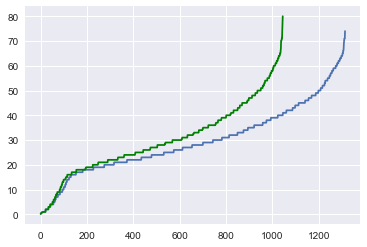

In [24]:
sns.plt.plot(titanic_facts_sort_age['Age'])
sns.plt.plot(titanic_data_kaggle_sort_age['Age'], 'g')

In [25]:
titanic_facts_sort_age.info()
print()
titanic_data_kaggle_sort_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 6 columns):
index                        1317 non-null int64
Surname                      1317 non-null object
First Names                  1317 non-null object
Age                          1315 non-null float64
Boarded                      1317 non-null object
Survivor () or Victim (†)    833 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 61.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
index          1309 non-null int64
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null obj

In [26]:
titanic_facts_sort_age['Name'] = titanic_facts_sort_age['Surname'] + titanic_facts_sort_age['First Names']

Test the operation of the get_close_matches( ) method to see if we can merge the datasets based on the name fields.

In [27]:
for i in range(0,5):
    tmp = dl.get_close_matches(titanic_data_kaggle_sort_age['Name'].iloc[i], titanic_facts_sort_age['Name'])
    try:
        print(str(len(tmp)) + ': ' + tmp[0] + ' / ' + titanic_data_kaggle_sort_age['Name'].iloc[i])
    except:
        print('No match' + ' / ' + titanic_data_kaggle_sort_age['Name'].iloc[i])
              

1: DeanMiss Elizabeth Gladys "Millvina" / Dean, Miss. Elizabeth Gladys Millvina""
1: DanbomMaster Gilbert Sigvard Emanuel / Danbom, Master. Gilbert Sigvard Emanuel
No match / Thomas, Master. Assad Alexander
No match / Hamalainen, Master. Viljo
1: BacliniMiss Eugenie / Baclini, Miss. Eugenie


In [28]:
def match_name(name):
    try:
        return dl.get_close_matches(name, titanic_facts_sort_age['Name'])[0]
    except:
        return 'No name match'

titanic_data_kaggle_sort_age['Name'] = titanic_data_kaggle_sort_age['Name'].apply(lambda name: match_name(name))

In [29]:
titanic_data_kaggle_sort_age[titanic_data_kaggle_sort_age['Name']!='No name match']

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Firstname,Othernames
0,1245,1246,NaN,3,"DeanMiss Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,Miss,Dean,Elizabeth,Gladys
1,1092,1093,NaN,3,DanbomMaster Gilbert Sigvard Emanuel,male,0.33,0,2,347080,14.4000,NaN,S,Master,Danbom,Gilbert,Sigvard
4,644,645,1.0,3,BacliniMiss Eugenie,female,0.75,2,1,2666,19.2583,NaN,C,Miss,Baclini,Eugenie,
5,469,470,1.0,3,BacliniMiss Helene Barbara,female,0.75,2,1,2666,19.2583,NaN,C,Miss,Baclini,Helene,
6,1172,1173,NaN,3,PeacockMaster Albert Edward,male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Master,Peacock,Alfred,
7,1198,1199,NaN,3,AksMaster Frank Philip,male,0.83,0,1,392091,9.3500,NaN,S,Master,Aks,Philip,
8,78,79,1.0,2,CaldwellMaster Alden Gates,male,0.83,0,2,248738,29.0000,NaN,S,Master,Caldwell,Alden,
9,831,832,1.0,2,RichardsMaster Sibley George,male,0.83,1,1,29106,18.7500,NaN,S,Master,Richards,George,
10,305,306,1.0,1,AllisonMaster Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,Master,Allison,Hudson,
11,1141,1142,NaN,2,WestMiss Barbara Joyce,female,0.92,1,2,C.A. 34651,27.7500,NaN,S,Miss,West,Barbara,


In [30]:
titanic_data_kaggle_sort_age['KaggleAge'] = titanic_data_kaggle_sort_age['Age']

In [31]:
titanic_merged = titanic_data_kaggle_sort_age.merge(titanic_facts_sort_age, how='left', left_on='Name', right_on='Name')


In [32]:
titanic_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 24 columns):
index_x                      1311 non-null int64
PassengerId                  1311 non-null int64
Survived                     892 non-null float64
Pclass                       1311 non-null int64
Name                         1311 non-null object
Sex                          1311 non-null object
Age_x                        1048 non-null float64
SibSp                        1311 non-null int64
Parch                        1311 non-null int64
Ticket                       1311 non-null object
Fare                         1310 non-null float64
Cabin                        295 non-null object
Embarked                     1309 non-null object
Title                        1311 non-null object
Surname_x                    1311 non-null object
Firstname                    1311 non-null object
Othernames                   1311 non-null object
KaggleAge                    1048 non-null floa

In [33]:
titanic_merged['AgeDiff'] = titanic_merged['KaggleAge'] - titanic_merged['Age_y']

In [34]:
titanic_merged['AgeDiff'] = titanic_merged['AgeDiff'].dropna()
titanic_merged['AgeDiff'].describe()

count    943.000000
mean       0.110371
std        4.823599
min      -26.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       51.000000
Name: AgeDiff, dtype: float64

In [35]:
titanic_merged.to_csv('titanic_merged.csv')

In [36]:
titanic_merged['AgeDiffMoreEps'] = titanic_merged['AgeDiff'].apply(lambda agediff : abs(agediff) > 2)
titanic_merged.corr()

,index_x,PassengerId,Survived,Pclass,Age_x,SibSp,Parch,Fare,KaggleAge,index_y,Age_y,AgeDiff,AgeDiffMoreEps
index_x,1.000000,1.000000,-0.005865,-0.037854,0.029089,-0.055475,0.008689,0.031140,0.029089,-0.054514,0.019261,0.050745,0.025506
PassengerId,1.000000,1.000000,-0.005865,-0.037854,0.029089,-0.055475,0.008689,0.031140,0.029089,-0.054514,0.019261,0.050745,0.025506
Survived,-0.005865,-0.005865,1.000000,-0.338965,-0.078270,-0.034886,0.082010,0.257613,-0.078270,-0.318357,-0.042884,-0.095094,0.053515
Pclass,-0.037854,-0.037854,-0.338965,1.000000,-0.406386,0.060174,0.017738,-0.558854,-0.406386,0.875317,-0.411487,-0.009239,-0.047696
Age_x,0.029089,0.029089,-0.078270,-0.406386,1.000000,-0.244189,-0.151426,0.177961,1.000000,-0.344511,0.945631,0.174402,0.104470
SibSp,-0.055475,-0.055475,-0.034886,0.060174,-0.244189,1.000000,0.373791,0.160539,-0.244189,0.055748,-0.249928,-0.015245,-0.024047
Parch,0.008689,0.008689,0.082010,0.017738,-0.151426,0.373791,1.000000,0.221798,-0.151426,-0.035369,-0.166326,0.017454,-0.025396
Fare,0.031140,0.031140,0.257613,-0.558854,0.177961,0.160539,0.221798,1.000000,0.177961,-0.460541,0.151827,0.029077,-0.001983
KaggleAge,0.029089,0.029089,-0.078270,-0.406386,1.000000,-0.244189,-0.151426,0.177961,1.000000,-0.344511,0.945631,0.174402,0.104470
index_y,-0.054514,-0.054514,-0.318357,0.875317,-0.344511,0.055748,-0.035369,-0.460541,-0.344511,1.000000,-0.356269,0.032024,-0.066655


In [37]:
titanic_merged['AgeDiff'].describe()

count    943.000000
mean       0.110371
std        4.823599
min      -26.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       51.000000
Name: AgeDiff, dtype: float64

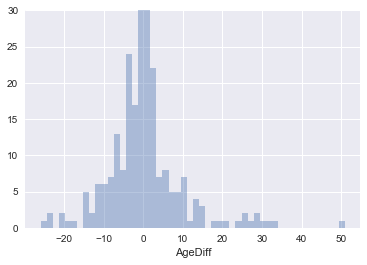

In [38]:
ax = sns.distplot(titanic_merged['AgeDiff'].dropna(), kde=False, bins=50)
ax.set_ylim(0,30);

So for the most part, allowing for the NaN differences in the data sets they look pretty similar (other than the max age of 80). So let's look at some of the other top values.

In [39]:
titanic_facts_sort_age['Age'].sort_values(na_position='first').tail(5)

1310    70.0
1313    71.0
1311    71.0
1312    71.0
1314    74.0
Name: Age, dtype: float64

In [40]:
titanic_data_kaggle_sort_age['Age'].sort_values(na_position='first').tail(5)

1041    71.0
1042    71.0
1043    74.0
1044    76.0
1045    80.0
Name: Age, dtype: float64

So it seems we have a 76 year old -- wonder if this age is also spurious?

In [41]:
titanic_data_kaggle_sort_age.iloc[1044]

index                                  987
PassengerId                            988
Survived                               NaN
Pclass                                   1
Name           CavendishMrs Julia Florence
Sex                                 female
Age                                     76
SibSp                                    1
Parch                                    0
Ticket                               19877
Fare                                 78.85
Cabin                                  C46
Embarked                                 S
Title                                  Mrs
Surname                          Cavendish
Firstname                            Julia
Othernames                 Florence Siegel
KaggleAge                               76
Name: 1044, dtype: object

Yes -- another one! Julia Florence Cavendish (who survived) was 25 at the time of the disaster. Her age at death was 76. c.f. https://www.encyclopedia-titanica.org/titanic-survivor/julia-florence-cavendish.html